# Numerical optimization: general review

### Authors: Gerard Castro Castillo & Sergio Hernández Jiménez

In [ ]:
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np
# matplotlib.use('Qt5Agg')

## 1. One dimensional case

### 1.
First, we plot $f(x)= x^3 - 2x +2$ within the range $x \in [-2,2]$ just by using matplotlib:

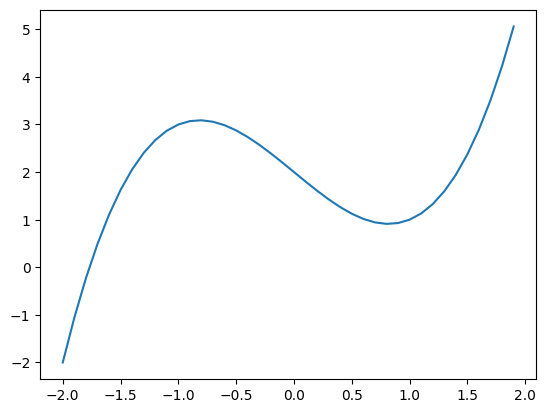

In [ ]:
# Plot x^2

# _Function to plot
X = np.arange(-2, 2, 0.1)
Y = X**3 - 2 * X + 2;

# Plot
line, = plt.plot(X, Y)
plt.show()

And we can appreciate there are 2 local extremes, as we could expect from a 3rd grade polynomial function.

### 2.

Since $f'(x)= 3x^2 -2$,  $x^*$ are those points which satisfy $f'(x^*) = 0$. That's it: $x= \pm \sqrt{\frac{2}{3}}$

<ipython-input-23-647e517e5125>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot([_x], [f(_x)], 'bo', color='black');


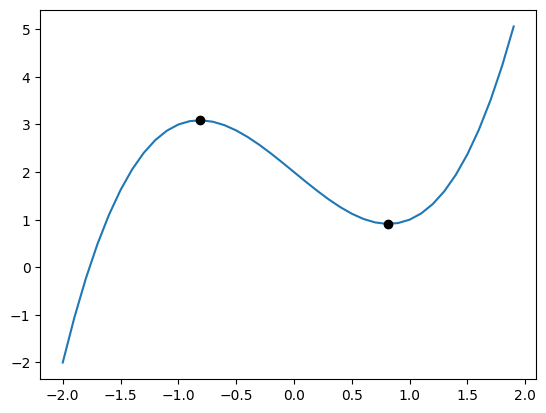

In [ ]:
# we check it numerically
x1, x2 = - np.sqrt(2 / 3), np.sqrt(2 / 3)
X = np.arange(-2, 2, 0.1)
f = lambda x: x**3 - 2 * x + 2;
Y = [f(x) for x in X]

# we plot the function
line, = plt.plot(X, Y)
# and the local minima / maxima
for _x in (x1, x2):
  plt.plot([_x], [f(_x)], 'bo', color='black');
plt.show();

And we can see that indeed these are the local minima and maxima.

### 3.

Since $f''(x)= 6x$, the Taylor expansion around $d$ is:
$$ f(x^* + d) = (x^*)^3 - 2 x^* + 2 + 3d(x^*)^2 - 2d + 3d^2 x^* = (x^*)^3 + 3d (x^*)^2 + (3d^2 - 2 )x^* + 2(1-d) $$

### 4.
We plot $f''(x)=6x$ within the range $x \in [-2,2]$:

<ipython-input-24-83b32aa611b9>:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot([_x], [f(_x)], 'bo', color='black');


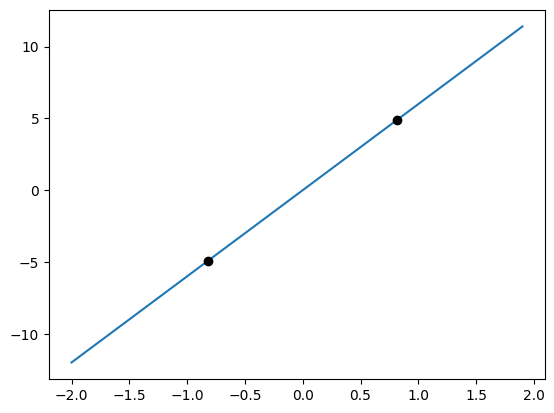

In [ ]:
X = np.arange(-2, 2, 0.1)
f = lambda x: 6*x;
Y = [f(x) for x in X]

# we plot the function
line, = plt.plot(X, Y)
# and the local minima / maxima
for _x in (x1, x2):
  plt.plot([_x], [f(_x)], 'bo', color='black');
plt.show();

And we can easily check that $x=-\sqrt{\frac{2}{3}}$ has a negative $f''$ (and thus a concave shape), while $x=\sqrt{\frac{2}{3}}$ has a positive $f''$ (and thus a convex shape).

## 2. Two dimensional case

In [ ]:
# necessary imports
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D

## 2.1. A simple two-dimensional function

###1.
We will first show there is indeed a minimum at $(0, 0)$ in $f(x)= x_1^2 + x_2^2$ by plotting the function:

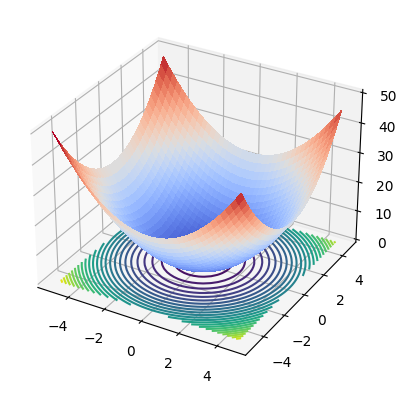

In [ ]:
%matplotlib inline

# Surface to plot
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = X**2 + Y**2

# Surface plot 3D + contour plot
fig = plt.figure()

# ax = fig.gca(projection='3d')
ax = fig.add_subplot(projection='3d')
# ax = Axes3D(fig)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                linewidth=0, antialiased=False)
ax.contour(X,Y,Z,30,zdir='z',offset=0);

plt.show()

###2.

Since $\nabla f(x) = \Big(\frac{\delta f(x)}{\delta x_1}, \frac{\delta f(x)}{\delta x_2}\Big)^T =  (2x_1, 2x_2)^T$, the point(s) $x^*$ such that $\nabla f(x) = 0$ can be found solving the linear system obtained with each of the 2 equations from each coordinate:

$ \{ \begin{align} 2x_ 1 &= 0 \\ 2x_ 2 &= 0 \end{align} $

That is: $x^* = (0, 0)^T$ (since $x_1=0, x_2=0$).

###3.

Note the Taylor expression, up to second order, involves a slight more complex form:

$$ f(x^* + d) \approx f(x^*) + d^T \nabla f(x^*) + \frac{1}{2} d^T \nabla ^ 2 f(x^*) d $$

While $f(x^*)$ is the (scalar) result of evaluating the function $f$ at $x^*\in \mathbb{R}^2$, $d^T \nabla f(x^*)$ is the scalar product of two vectors (since $d\in \mathbb{R}$ and $ \nabla ^2 f(x^*) d $ is a product between the Hessian matrix and vector d, later multiplied by the $d^T$.

This Hessian matrix $\nabla ^ 2 f(x)$ is computed $\forall x\in \mathbb{R}^2$ as it follows:
$$\nabla^2 f(x) = \begin{pmatrix} \frac{\delta^2 f(x)}{\delta x_1^2} & \frac{\delta^2 f(x)}{\delta x_1 \delta x_2} \\ \frac{\delta^2 f(x)}{\delta x_2 \delta x_1} & \frac{\delta^2 f(x)}{\delta x_2^2} \end{pmatrix} = \begin{pmatrix} 2 & 0 \\ 0 & 2 \end{pmatrix}$$

Since $\frac{\delta^2 f(x)}{\delta x_1^2} = \frac{\delta (2x_1)}{\delta x_1} = 2 = \frac{\delta (2x_2)}{\delta x_2} = \frac{\delta^2 f(x)}{\delta x_2^2}$ and $\frac{\delta^2 f(x)}{\delta x_1\delta x_2} = \frac{\delta (2x_1)}{\delta x_2} = 0 = \frac{\delta^2 f(x)}{\delta x_2\delta x_1} $

Let us now extend the convexity study in 2 dimensions in terms of the eigenvalues of the Hessian matrix. If we find them as root of the characteristic polynomial, we find that there is a double root $\lambda=2$:
$$ \begin{vmatrix} 2 - \lambda & 0 \\ 0 & 2 - \lambda \end{vmatrix} = 0 \Rightarrow (2 - \lambda)^2 = 0 \Rightarrow \lambda = 2 $$

Thus, since both of the 2 eigenvalues are positive, then we have a minimum at $(0, 0)$.

### 4.
Let us now analyze each of the 3 following different functions to see different behaviours for the Hessian matrix and its eigenvalues:

In [ ]:
def plot_function(func: callable, X: np.ndarray = None, Y: np.ndarray = None) -> None:
  # Surface to plot
  if X is None:
    X = np.arange(-5, 5, 0.25)
  if Y is None:
    Y = np.arange(-5, 5, 0.25)
  X, Y = np.meshgrid(X, Y)
  # function images
  Z = func(X, Y)
  # Surface plot 3D + contour plot
  fig = plt.figure()
  # ax = fig.gca(projection='3d')
  ax = fig.add_subplot(projection='3d')
  # ax = Axes3D(fig)
  ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                  linewidth=0, antialiased=False)
  ax.contour(X,Y,Z,30,zdir='z',offset=0);
  plt.show()

### Function A

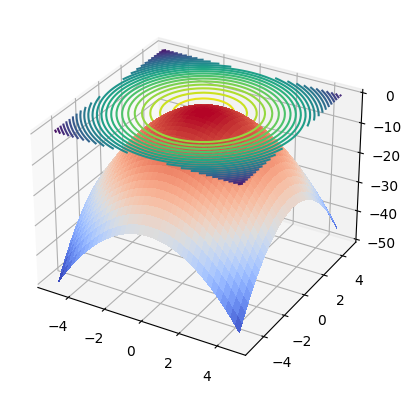

In [ ]:
f_A = lambda x_1, x_2: - x_1**2 - x_2**2
plot_function(f_A)

And, indeed, the maximum is sought at $(0, 0)$, since $ \nabla f_{A}(x) = (-2x_1, -2x_2) = (0, 0) ⇔ x_1 = 0, x_2 = 0 $.

But the Hessian matrix,
$$\nabla^2 f_A(x) = \begin{pmatrix} \frac{\delta^2 f_A(x)}{\delta x_1^2} & \frac{\delta^2 f_A(x)}{\delta x_1 \delta x_2} \\ \frac{\delta^2 f_A(x)}{\delta x_2 \delta x_1} & \frac{\delta^2 f_A(x)}{\delta x_2^2} \end{pmatrix} = \begin{pmatrix} -2 & 0 \\ 0 & -2 \end{pmatrix} $$
has now 2 negative eigenvalues:

In [ ]:
hess_f_A = np.matrix([[-2, 0], [0, -2]])
np.linalg.eigvals(hess_f_A)

array([-2., -2.])

### Function B

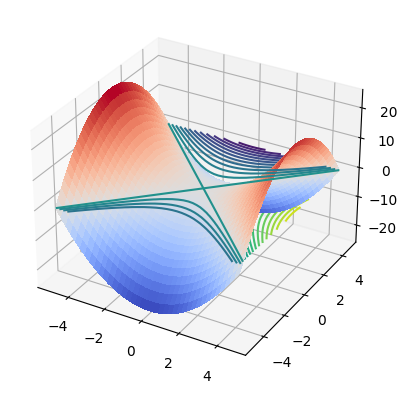

In [ ]:
f_B = lambda x_1, x_2: x_1**2 - x_2**2
plot_function(f_B)

And now, it seems there is no local extreme, even though in $(0, 0)$ the gradient is zero: $ \nabla f_{B}(x) = (2x_1, -2x_2) = (0,0) ⟺ x_1 = 0, x_2 = 0 $.

Let us see this is because the Hessian matrix,
$$\nabla^2 f_B(x) = \begin{pmatrix} \frac{\delta^2 f_B(x)}{\delta x_1^2} & \frac{\delta^2 f_B(x)}{\delta x_1 \delta x_2} \\ \frac{\delta^2 f_B(x)}{\delta x_2 \delta x_1} & \frac{\delta^2 f_B(x)}{\delta x_2^2} \end{pmatrix} = \begin{pmatrix} 2 & 0 \\ 0 & -2 \end{pmatrix}$$,
presents at $(0, 0)$ eigenvalues with opposite sign:

In [ ]:
hess_f_B = np.matrix([[2, 0], [0, -2]])
np.linalg.eigvals(hess_f_B)

array([ 2., -2.])

### Function C

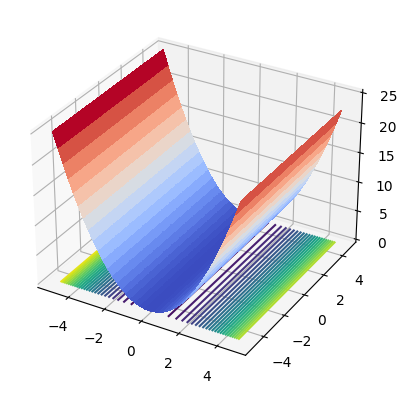

In [ ]:
f_C = lambda x_1, x_2: x_1**2
plot_function(f_C)

In this case, there it seems to be infinite points in which the minimum is sought: actually, $\forall x_2\in \mathbb{R}$ and $x_1=0$:
$ \nabla f_C (x) = (2x_1, 0) = (0, 0) ⟺ x_1 = 0, \forall x_2\in \mathbb{R}$

Let us see this is because one of the eigenvalues is 0 in these points. Being the Hessian matrix
$$\nabla^2 f_C(x) = \begin{pmatrix} \frac{\delta^2 f_C(x)}{\delta x_1^2} & \frac{\delta^2 f_C(x)}{\delta x_1 \delta x_2} \\ \frac{\delta^2 f_C(x)}{\delta x_2 \delta x_1} & \frac{\delta^2 f_C(x)}{\delta x_2^2} \end{pmatrix} = \begin{pmatrix} 2 & 0 \\ 0 & 0 \end{pmatrix}$$
Then:

In [ ]:
hess_f_C = np.matrix([[2, 0], [0, 0]])
np.linalg.eigvals(hess_f_C)

array([2., 0.])

## 2.2 A two dimensional function with multiple minima

###1.
Let us plot a more complex function:

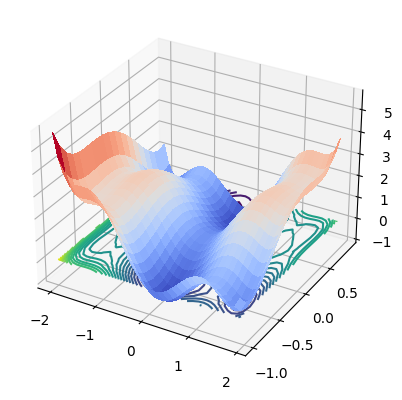

In [ ]:
f = lambda x_1, x_2: x_1**2*(4-2.1*x_1**2 + (1/3)*x_1**4) + x_1*x_2 + x_2**2*(-4+4*x_2**2)
plot_function(f, np.arange(-2, 2, 0.1), np.arange(-1, 1, 0.1))

There seems to be several extremes: *e.g.* a local maximum close to $(x_1, x_2) = (1, 0)$ and a minimum next to both $(x_1, x_2) = (0, -0.5)$ & $(x_1, x_2) = (0, 0.5)$. This is something we can more precisely assess in terms of the roots $x^*$ of the gradient.

###2.
The gradient $\nabla f(x)$ is:

$$\nabla f(x) = (8x_1 - 8.4 x_1^3 + 2 x_1^5 + x_2,\; x_1 -8x_2 + 16 x_2^3)$$


###3.
Let us find the roots $x^*$ numerically:

###(a)

In [ ]:
grad_f = lambda x_1, x_2: (8*x_1-8.4*x_1**3+2*x_1**5+x_2)**2 + (x_1 - 8*x_2+16*x_2**3)**2

# now we will save in a matrix their values:
step = 0.005
x_range = np.arange(-2, 2, step=step)
y_range = np.arange(-1, 1, step=step)

grad_matrix = np.zeros((len(x_range), len(y_range)))
for i, x_i in enumerate(x_range):
  for j, x_j in enumerate(y_range):
    grad_matrix[i, j] = grad_f(x_i, x_j)

# print(grad_matrix)  # we can check it

###(b)

In [ ]:
# now we search for candidates of the gradient's roots
# and we evaluate their imag
candidates_of_root = []
candidates_images = []

def _nearest_points_have_higher_gradient(grad_matrix, i, j) -> bool:
  value = grad_matrix[i, j]
  borders = [grad_matrix[i - 1, j - 1], grad_matrix[i - 1, j],
             grad_matrix[i, j - 1], grad_matrix[i + 1, j],
             grad_matrix[i, j + 1], grad_matrix[i + 1, j + 1],
             grad_matrix[i - 1, j + 1], grad_matrix[i + 1, j - 1]]
  # True if all 8 borders have higher gradient
  return all([value < border for border in borders])

for i, x_i in enumerate(x_range[1:-1], start=1):
    for j, y_j in enumerate(y_range[1:-1], start=1):
        if _nearest_points_have_higher_gradient(grad_matrix, i, j):
            candidates_of_root.append([x_i, y_j])
            candidates_images.append(grad_matrix[i, j])

print("We obtained a total of", len(candidates_of_root), "candidates of root")

We obtained a total of 15 candidates of root


###(c)

In [ ]:
print("The candidates are the following and its gradient is equal to:")
for _i, _c in enumerate(candidates_of_root):
  print("(x, y) = ", _c, "; gradient = ", candidates_images[_i])

The candidates are the following and its gradient is equal to:
(x, y) =  [-1.7050000000000063, 0.7950000000000017] ; gradient =  0.0014301678960872899
(x, y) =  [-1.6400000000000077, -0.22999999999999932] ; gradient =  0.00067458253056989
(x, y) =  [-1.6050000000000084, -0.5699999999999996] ; gradient =  0.0004156534940928455
(x, y) =  [-1.295000000000015, -0.6049999999999996] ; gradient =  4.540503633256789e-05
(x, y) =  [-1.2300000000000164, -0.15999999999999925] ; gradient =  0.00024181811612573363
(x, y) =  [-1.110000000000019, 0.7700000000000016] ; gradient =  0.0012559284739378034
(x, y) =  [-0.09000000000004071, 0.7150000000000016] ; gradient =  0.0014768714734470522
(x, y) =  [-4.263256414560601e-14, 8.881784197001252e-16] ; gradient =  1.181910851247381e-25
(x, y) =  [0.08999999999995545, -0.7149999999999997] ; gradient =  0.0014768714734526888
(x, y) =  [1.1099999999999337, -0.7699999999999998] ; gradient =  0.0012559284739304191
(x, y) =  [1.2299999999999311, 0.1600000000000

Which makes sense because all the gradients are "close" to $0$.

###4.
After a quick derivation, it is seen the Hessian matrix is:
$$\nabla^2 f(x) = \begin{pmatrix} \frac{\delta^2 f(x)}{\delta x_1^2} & \frac{\delta^2 f(x)}{\delta x_1 \delta x_2} \\ \frac{\delta^2 f(x)}{\delta x_2 \delta x_1} & \frac{\delta^2 f(x)}{\delta x_2^2} \end{pmatrix} = \begin{pmatrix} 8 - 25.2 x_1^2 + 10 x_1^4 & 1 \\ 1 & -8 + 48 x_2^2 \end{pmatrix}$$

In [ ]:
hess_f = lambda x_1, x_2: np.array([[8-25.2*x_1**2+10*x_1**4, 1], [1, -8 + 48*x_2**2]])

Having into account that:
- If 1 eigenvalue is positive and the other negative ⇒ there is a saddle
- If both eigenvalues are negative ⇒ there is a maximum
- If both eigenvalues are positive ⇒ there is a minimum
- If one of them is 0 ⇒ it may depend on the situation
We can conclude our analysis:

In [ ]:
n_saddle, n_max, n_min, n_undefined = 0, 0, 0, 0
for candidate in candidates_of_root:
  eigenvalues = np.linalg.eigvals(hess_f(*candidate))
  if eigenvalues[0] * eigenvalues[1] < 0:
    n_saddle += 1
  elif all([e > 0 for e in eigenvalues]):
    n_min += 1
  elif all([e < 0 for e in eigenvalues]):
    n_max += 1
  else:
    n_undefined += 1

print("We have found:", n_saddle, "saddle points,", n_max, "maximums,",
      n_min, "minimums and", n_undefined, "whose situation is more complex.")

We have found: 7 saddle points, 2 maximums, 6 minimums and 0 whose situation is more complex.
